# Exploring MNE's data structure

---

## Learning Objectives
- Import raw EEG data using MNE
- Examine the structure of an MNE `Raw` object
- Access and view different attributes of a `Raw` data object
- Visualize the positions of EEG electrodes 


---
## Introduction

In this lesson, we will load a raw EEG data file using MNE and gain an understanding of how MNE stores data. This is an important first step to working with data in MNE.

## Load Packages

In [1]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

:::{tip}

In the above cell, we ran a command after importing mne, `mne.set_log_level('error')`. If you don't run this when using MNE, you will find that MNE provides a lot output, and often including some concerning-looking Python warning messages. Most of these warnings are safely ignored. I generally find this output more confusing than helpful, and turn it off routinely. For our lessons we will keep the output off because it just creates confusion. Many MNE comnmands have a `verbose` kwarg that allows you to change the amount of output a particular command generates. This can be useful if you want more information about what a command is doing; for example, some functions take a long time to run and you can increase the verbosity to see how far along the function is.
:::

## Import raw data

For EEG, raw data is typically stored in a one or more files containing continuous EEG data. There are many different proprietary file formats for EEG data; most of these are developed by the manufacturer of a particular EEG system, since an integral part of an EEG system is software to save the data for later analysis. Fortunately, MNE provides functions to import data from most common EEG systems. 

In the present case, we are working with data from a system sold by Brain Products, whose software is called *Brain Vision*. So we will use MNE's `read_raw_brainvision()` function. The Brain Vision format actually specifies *three files* for any given data set. The three files are all created at the time that the EEG data is acquired, and it's important to ensure that all three are copied when moving them around. The files are as follows:
- `*.eeg` is the actual EEG data (electrical potential measurements for all electrodes, at all time points). This is stored in a compressed (binary) format
- `*.vmrk` is a text file containing all of the markers (*trigger codes*) that were sent to the EEG system during data collection, by the stimulus computer. These typically encode the onset of various stimuli, and times of any responses by the participant, as well as and what each stimulus/response was. 
- `*.vhdr` is a text file with header information, or **metadata** about the data set, including technical details such as the sampling rate, and the settings of the EEG amplifier during the recording. The `.vhdr` file is particularly important because it specifies the file names of the `.eeg` and `.vmrk` files (although they should always be named consistently with the header file). 

When we run `read_raw_brainvision()` the file we will actually pass as an argument is the `.vhdr` file. Since it specifies the names of the associated `.eeg` and `.vmrk` files, from this file MNE can find the data and markers.

As described previously, many of MNE's functions are nested inside subfolders (modules); for example, all of the file input-output (I/O) routines are in the module `mne.io`. So when we call the `read_raw_brainvision()` function, we have to do so as `mne.io.read_raw_brainvision()`. The one required argument for this function is the file name, and that's all we need for now: 

In [3]:
raw = mne.io.read_raw_brainvision('data/sub-001/sub-001.vhdr')

### View raw data attributes

We now have our raw EEG data represented in Python as an MNE `Raw` object. We can view it's basic information by asking for the `.info` property:

In [4]:
raw.info

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


Although some of the information is not available, this shows us a few important things about our data set, including that there are 16 EEG channels (each channel contains the data from one EEG electrode), that the sampling rate is 500 Hz (i.e., EEG data were sampled 500 times per second, so we have a data point every 2 ms), and that the data were filtered during data collection between 0.01–80 Hz (more on filtering below).

The information provided above is actually a subset of the information stored in the `Raw` object's `info`. We can use the `.keys()` method to see all of the fields available in `info`:

In [5]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

We can access the values stored with any of these info attributes by putting it in square brackets, like this command to access the names of all of the channels (electrodes) in the data set:

In [6]:
raw.info['ch_names']

['Fp1',
 'F3',
 'F7',
 'C3',
 'P3',
 'TP9',
 'Fz',
 'Cz',
 'Fp2',
 'F4',
 'F8',
 'C4',
 'P4',
 'TP10',
 'Pz',
 'Oz']

The `info` is a snapshot of a few pieces of information that researchers may want to know about a data file, but it's far less than all the information stored in the MNE `Raw` object. To see the entire contents of the object, we can ask for it's `__dict__` (note that there are two underscores below `dict` and two after). Recall that `Raw` is a Python class, and any instance of the `Raw` class (such as our `raw` data here) is a Python object. Any Python object has an atrribute `__dict__`, and this attribute contains a dictionary of all of the object's attributes, with keys being the attribute names, and values being the information stored for that attribute.

Because it generates a lot of output, we won't show the entire `__dict__` here, just some of the output — but you can try it yourself. You will see that there is a lot of information stored in the `Raw` object, including the actual EEG data, the sampling rate, the names of the channels, and much more.

```{python}
raw.__dict__
```

```{python}
{'preload': False,
 '_last_samps': array([408639]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: Fp1, F3, F7, C3, P3, TP9, Fz, Cz, Fp2, F4, F8, C4, P4, TP10, Pz, Oz
  chs: 16 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 80.0 Hz
  meas_date: 2015-01-20 13:15:58 UTC
  nchan: 16
  projs: []
  sfreq: 500.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08,
        4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08,
        4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08,
        4.88281e-08]),
 '_raw_extras': [{'offsets': None,
   'fmt': 'single',
   'order': 'F',
   'n_samples': 408640,
   'orig_nchan': 16}],
...
  'misc': 'auto',
  'scale': 1.0,
  'preload': False,
  'verbose': None},
 'impedances': {}}
```

## Where's the data?

For all the information that is in the output above, even if you run it yourself and look through all the output, you would find that there is no actual EEG data! This is because, by default, MNE's routines to read raw data read the data file's *header* into memory, but not the data itself. The reason for this is that data files are often quite large, and so reading them in sometimes takes a noticeable amount of time, and consume significant memory. The header of a raw EEG data file contains its metadata (information about the file), as you saw above in printing out the `__dict__` this is often enough for MNE to perform some operations on the data. At some point, if you want to perform operations on the EEG data, then MNE will automatically load in the data to work on it. 

The fact that the data is not loaded is indicated in the `.__dict__` output above by the first dictionary entry: `preload: False`. We can ask MNE to load the data using the `.load_data()` method, as shown below. 

Alternatively, when we originally read the raw data file, we could have told MNE to load the data with the `preload` kwarg, like this:

```{python}
raw = mne.io.read_raw_brainvision('data/sub-001/sub-001.vhdr', 
                                  preload=True)
```

In [5]:
raw.load_data()

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


Now `raw` has a `_data` attribute, containing a NumPy array:

In [6]:
print(type(raw._data))

<class 'numpy.ndarray'>


MNE represents the data as a 2D array with a row for each channel, and columns for time points. IF we ask for its `shape` attribute, we see that our raw data comprises 16 channels and 408,640 time points:

In [7]:
print(raw._data.shape)

(16, 408640)


One challenge in working with the raw data directly in this way, is that each time point in the continuous data is not necessarily a multiple of 1 ms. When EEG data is recorded, the continuous data is *sampled* (measured) at a particular rate, called the *sampling frequency*. This is the number of measurements per second. We can see the sampling rate of an MNE dataset by accessing the `sfreq` property of the `.info` attribute:

In [8]:
raw.info['sfreq']

500.0

So our data were sampled at 500 Hz, meaning that there are 500 measurements per second. This means that each measurement is 1/500th of a second, or 2 ms. So we can derive the length of the EEG recording, in seconds, by dividing the number of time points by the sampling rate:

In [9]:
scan_durn = raw._data.shape[1] / raw.info['sfreq']
print('Duration of EEG recording = ', scan_durn, 's, or', round(scan_durn / 60, 2), 'min.')

Duration of EEG recording =  817.28 s, or 13.62 min.


## Accessing subsets of data

Since the data is stored as a NumPy array, we can access specific data points using standard indexing. For example, if we wanted to select all of the data from only channel 15, we would use:

In [14]:
print(raw._data[15, :])

[-3.00623740e-05 -3.05631481e-05 -3.14957457e-05 ... -1.21160445e-05
 -1.18659912e-05 -1.28832751e-05]


If we wanted to slice in time, we would need to consider the sampling frequency. For example, if we wanted the data from channel 15, but only from 1000 - 1100 ms, we would need to convert those times to samples, and then use those indices to slice the data. We can do this by multiplying the times (in seconds) by the sampling rate, and then converting the result to an integer (since the result of the multiplication will be a float), as shown bnelow. While this is not necessarily difficult, it's a bit tricky. It would be nice if we could work with our data in terms of uinits of time, and not samples.

In [11]:
start_time = int(1.0 * raw.info['sfreq'])
end_time = int(1.1 * raw.info['sfreq'])
chan = 15
raw._data[chan, start_time:end_time]

array([-3.32371542e-05, -3.56695946e-05, -3.70699693e-05, -3.73843955e-05,
       -3.61347967e-05, -3.37185687e-05, -3.24967218e-05, -3.43886199e-05,
       -3.84356302e-05, -4.12323741e-05, -4.10137920e-05, -3.98413454e-05,
       -4.01963982e-05, -4.22024511e-05, -4.45214044e-05, -4.58859209e-05,
       -4.59046129e-05, -4.50669058e-05, -4.43964731e-05, -4.46733246e-05,
       -4.59191087e-05, -4.77312797e-05, -4.90899788e-05, -4.91470085e-05,
       -4.88116014e-05, -4.93814216e-05, -5.04391412e-05, -5.07022598e-05,
       -5.01242381e-05, -4.98433812e-05, -5.00698787e-05, -5.00764590e-05,
       -4.94547591e-05, -4.80297796e-05, -4.60116151e-05, -4.45004235e-05,
       -4.49821242e-05, -4.72950693e-05, -4.82656232e-05, -4.62170364e-05,
       -4.42591441e-05, -4.39658894e-05, -4.31154984e-05, -4.12371424e-05,
       -3.99026666e-05, -3.87107651e-05, -3.58946616e-05, -3.21113422e-05,
       -3.00001944e-05, -3.01028098e-05])

Fortunately, MNE provides a way to do this. The `.get_data()` method of the `Raw` object allows us to specify the time range we want, in seconds, and it will return the data in that time range. We can use the `tmin` and `tmax` kwargs to specify the time range, and the `picks` kwarg to specify the channels using their 10-10 system labels, rather than needing to know which row in the data array corresponds to which channel.

For example, to get the data from channel Oz, from 1000 - 1100 ms, we can use:

In [12]:
raw.get_data(picks = 'Oz', tmin=1.0, tmax=1.1)

array([[-3.32371542e-05, -3.56695946e-05, -3.70699693e-05,
        -3.73843955e-05, -3.61347967e-05, -3.37185687e-05,
        -3.24967218e-05, -3.43886199e-05, -3.84356302e-05,
        -4.12323741e-05, -4.10137920e-05, -3.98413454e-05,
        -4.01963982e-05, -4.22024511e-05, -4.45214044e-05,
        -4.58859209e-05, -4.59046129e-05, -4.50669058e-05,
        -4.43964731e-05, -4.46733246e-05, -4.59191087e-05,
        -4.77312797e-05, -4.90899788e-05, -4.91470085e-05,
        -4.88116014e-05, -4.93814216e-05, -5.04391412e-05,
        -5.07022598e-05, -5.01242381e-05, -4.98433812e-05,
        -5.00698787e-05, -5.00764590e-05, -4.94547591e-05,
        -4.80297796e-05, -4.60116151e-05, -4.45004235e-05,
        -4.49821242e-05, -4.72950693e-05, -4.82656232e-05,
        -4.62170364e-05, -4.42591441e-05, -4.39658894e-05,
        -4.31154984e-05, -4.12371424e-05, -3.99026666e-05,
        -3.87107651e-05, -3.58946616e-05, -3.21113422e-05,
        -3.00001944e-05, -3.01028098e-05]])

## Visualizing raw EEG data

### Plot EEG data with Matplotlib

Since we understand how to select a particular segment of data and return it as a NumPy array, it's eay to pass the result of doing this to Matplotlib, and visualize the electrical potential of a specific electrode over a segment of time. It's good practice to use variables to pass to the various kwargs we want to use in the plot command — this makes it easy to modify them as necessary. But since storing a slice of data could consume a lot of memory, it's better just to pass the slice directly to the plot command, as shown below.

One thing to note here is the `.T` operator, which *transposes* the data array (i.e., swaps the rows and columns). To be honest, I didn't understand why this was — Matplotlib expects the data as rows (*x* axis) columns (*y* axis), which is how are data are shaped. So I asked Copilot Chat, and got the following answer:

:::{admonition} Copilot Chat output:

In Python, when you're dealing with a 2D numpy array, each row represents a separate data sequence. When you're plotting this data, you typically want each sequence to be plotted along the x-axis, with the y-axis representing the values in the sequence.

However, when you extract a row from a 2D numpy array, you get a 1D array. If you try to plot this directly, matplotlib will plot the indices of the array on the x-axis and the values on the y-axis. This might not be what you want if your data sequence doesn't naturally correspond to these indices.

By transposing the 1D array (turning it into a 2D array with one column), you're telling matplotlib to treat the single data sequence as a column of values to be plotted along the y-axis, with the x-axis representing the sequence position within the column. This is typically the desired behavior when plotting a single data sequence.
:::

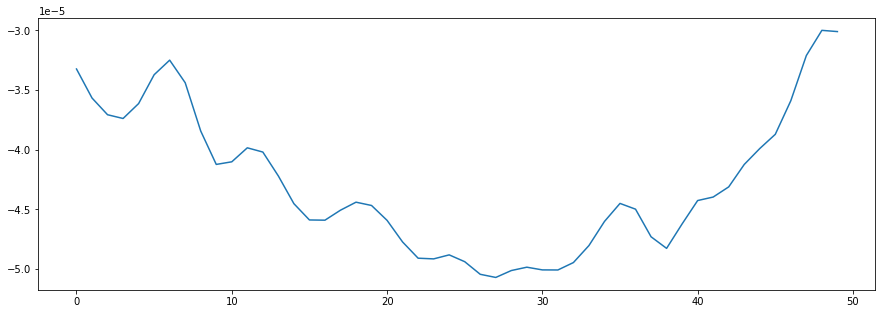

In [20]:
chan = 'Oz'
start_time = 1.0
end_time = 1.1

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(raw.get_data(picks=chan, tmin=start_time, tmax=end_time).T)
plt.show()

If we look at the axes of the plot below, we see that the *x* axis is time — but in units of samples, not seconds, with zero being the first sample (even though it's actually 1 s from the start of the recording). This is because we passed the data directly to Matplotlib, and it doesn't know anything about the sampling rate. We can fix this by passing the time values to the `x` kwarg, and the data to the `y` kwarg. We can get the time values by using the `linspace()` function from NumPy, which will return an array of evenly spaced values between the start and end times we specify. We can specify the start time as 1, and the end time as the length of the data divided by the sampling rate, as shown below. We can also specify the `ylim` kwarg to set the y-axis limits to a reasonable range.

Since we use the data slice twice in the code below, it's convenient to store it in a variable.

In [25]:
sorted(plt.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'Voltage (uV)')

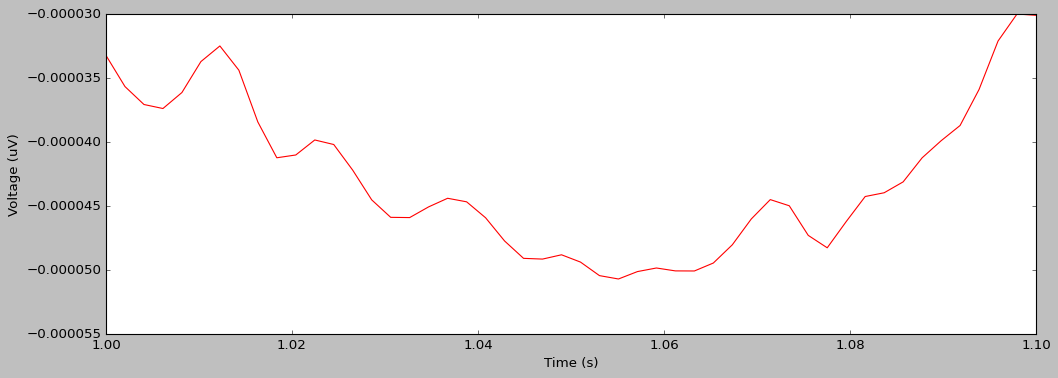

In [30]:
chan = 'Oz'
start_time = 1.0
end_time = 1.1

# Get data from channel Oz, from 1000-1100 ms
data = raw.get_data(picks=chan, tmin=start_time, tmax=end_time).T

# Get time values
times = np.linspace(start_time, end_time, num=data.shape[0])

# Plot data
fig, ax = plt.subplots(figsize=[15,5])
ax.plot(times, data, color='red')

# Label axes
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

---

## Summary

- MNE can load raw EEG data from standard file formats, and stores the data in a `Raw` object. 
- The `Raw` object contains a lot of information about the data (metadata), but does not load the data into memory by default.
- The metadata can be accessed using the `.info` attribute of the `Raw` object. Many other attribues fo the `Raw` object are visible using the `.__dict__` attribute
- By default, MNE does not load the data into memory. We can load it either with the `preload` kwarg when reading the data, or by calling the `.load_data()` method of the `Raw` object
- Since the raw data is stored in a NumPy array, we can access subsets of the data using standard NumPy indexing
- Likewise, we can use Matpltlib to plot data from the NumPy array. When plotting a 1D NumPy array, we need to transpose it first, using `.T`

In the next lesson, we will learn how to use MNE's built-in functions and methods for visualization. These are much more convenient, because they allow you to think of your data in specifically EEG/MNE terms, rather than metnally translating between EEG concepts and NumPy arrays. MNE automatically does thinks like converting samples to time, and taking inputs as challen labels and times in seconds, rather than numerical indexes of NumPy arrays.
